In [3]:
#PREDICTION DU DIABETE AVEC LE RANDOM FOREST
import numpy as np
import pandas as pd


In [11]:
data= pd.read_csv('D:\Mon_dossier\DiabeteKaggle.csv')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\windows 10\AppData\Local\Temp\ipykernel_2352\889015614.py:1: SyntaxWarning: invalid escape sequence '\M'
  data= pd.read_csv('D:\Mon_dossier\DiabeteKaggle.csv')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
peek= data.head()
print(peek)

   Grocesses  Glucose  PressionArterielle  EpaisseurDeLaPeau  Insuline   IMC  \
0          6      148                  72                 35         0  33.6   
1          1       85                  66                 29         0  26.6   
2          8      183                  64                  0         0  23.3   
3          1       89                  66                 23        94  28.1   
4          0      137                  40                 35       168  43.1   

   FonctionGenealogique  Age  Outcome  
0                 0.627   50        1  
1                 0.351   31        0  
2                 0.672   32        1  
3                 0.167   21        0  
4                 2.288   33        1  


In [17]:
data.rename(columns = {'Pregnancies':'Grocesses'},inplace = True )
data.rename(columns = {'BloodPressure':'PressionArterielle'},inplace = True )
data.rename(columns = {'SkinThickness':'EpaisseurDeLaPeau'},inplace = True )
data.rename(columns = {'Insulin':'Insuline'},inplace = True )
data.rename(columns = {'BMI':'IMC'},inplace = True )
data.rename(columns = {'DiabetesPedigreeFunction':'FonctionGenealogique'},inplace = True )
print(peek)

   Grocesses  Glucose  PressionArterielle  EpaisseurDeLaPeau  Insuline   IMC  \
0          6      148                  72                 35         0  33.6   
1          1       85                  66                 29         0  26.6   
2          8      183                  64                  0         0  23.3   
3          1       89                  66                 23        94  28.1   
4          0      137                  40                 35       168  43.1   

   FonctionGenealogique  Age  Outcome  
0                 0.627   50        1  
1                 0.351   31        0  
2                 0.672   32        1  
3                 0.167   21        0  
4                 2.288   33        1  


In [19]:
#Isolation de la colonne Outcome pour la classification
x = np.array(data.drop(['Outcome'],axis = 1))
y = np.array(data['Outcome'])

In [20]:
#Affichage des valeurs null
print(data.isnull().sum())

Grocesses               0
Glucose                 0
PressionArterielle      0
EpaisseurDeLaPeau       0
Insuline                0
IMC                     0
FonctionGenealogique    0
Age                     0
Outcome                 0
dtype: int64


array([[<Axes: title={'center': 'Grocesses'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'PressionArterielle'}>],
       [<Axes: title={'center': 'EpaisseurDeLaPeau'}>,
        <Axes: title={'center': 'Insuline'}>,
        <Axes: title={'center': 'IMC'}>],
       [<Axes: title={'center': 'FonctionGenealogique'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

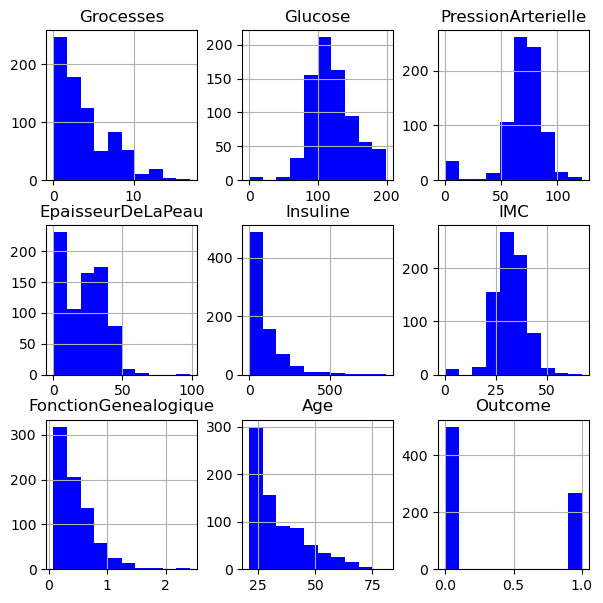

In [22]:
#Histogramme d'avant le nettoyage
import matplotlib.pyplot as plt
data.hist(figsize = (7,7),color = 'blue')

In [23]:
#Caractéristiques de mise à l'échelle avec StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(data.drop(columns = ["Outcome"])),
                 columns = data.columns[:-1])
x.head()
y = data['Outcome']

In [24]:
#Division des données en deux sous-ensembles: celui d'entrainement et celui de test
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2, random_state = 42, stratify = y)
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [25]:
#Le modèle du Random forest avec les hyperparamètres de réglage (hyperparameter Tuning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

#Grille d'hyperparamètres
param_grid = {
    'n_estimators':[50,100,200,300],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10]
}
#Exécution du gridSearch avec le Cross-validation
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring ='accuracy', n_jobs = -1)
grid.fit(x_train, y_train)

#Obtention du meilleur modèle
print("Les meilleurs paramètres:", grid.best_params_)
rfc = grid.best_estimator_

Les meilleurs paramètres: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [26]:
#Prédictions
y_train_pred = rfc.predict(x_train) #sous-ensemble d'entrainement pour la prédiction
y_test_pred = rfc.predict(x_test) #sous-ensemble de test pour la prédiction
#Scores de précision (Accuracy)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(" La précision d'entrainement est de:",train_acc*100,"%")
print(" La précision du test est de :",test_acc*100,"%")

 La précision d'entrainement est de: 99.6742671009772 %
 La précision du test est de : 75.32467532467533 %
